# Exercise 7 - Theory

*(1) Consider a Bianconi-Barabási model with two distinct fitness values $\eta = 1$ and $\eta = a$ with $0 \le a \le 1$ resulting in a fitness distribution given as $\rho(\eta) = \frac{\delta(\eta - 1) + \delta(\eta - a)}{2}.$ Calculate the stationary degree distribution of the network and the degree exponent, with its dependence on the parameter* $a.$

The degree distribution of a Bianconi-Barabási model can be approximated by

$$p(k) = C \int \frac{\rho(\eta)}{\eta} \Big( \frac{m}{k} \Big)^{\frac{C}{\eta} + 1} \mathrm{d} \eta,$$

where $C$ satisfies

$$C = \int \rho(\eta) \frac{\eta}{1 - \frac{\eta}{C}} \mathrm{d} \eta.$$

Using the integral property of the Dirac delta $\int_\mathbb{R} f(x) \delta(x) \mathrm{d}x = f(0)$ and solving for $C$ we get:

$$\begin{align*}
C &= \int \rho(\eta) \frac{C \eta}{C - \eta} \mathrm{d} \eta \\
&= \frac{C}{2} \int \delta(\eta - 1) \frac{\eta}{C - \eta} \mathrm{d} \eta + \frac{C}{2} \int \delta(\eta - a) \frac{\eta}{C - \eta} \mathrm{d} \eta \\
&= \frac{C}{2} \frac{1}{C - 1} + \frac{C}{2} \frac{a}{C - a} \\
&= \frac{C}{2} \Big( \frac{1}{C - 1} + \frac{a}{C - a} \Big) \\
\iff C &= 0 \text{ or } 2 C^2 - 3 (a + 1) C + 4 a = 0 \\
\iff C &= 0 \text{ or } C = \frac{3 (a + 1) \pm \sqrt{9 a^2 - 14 a + 9}}{4}
\end{align*}$$

Since $C = 0$ would result in $p(k) = 0$ we can disregard this case. But for the other two cases one could plug them into the following expression for the degree distribution to get the full picture of the dependence on $a.$

$$p(k) = C \left( \left( \frac{m}{k} \right)^{1+C} + \frac{1}{a} \left( \frac{m}{k} \right)^{1+\frac{C}{a}} \right)$$

Same goes for the exponent $\beta(\eta) = \frac{\eta}{C}$ of the degree dynamics $k(t,t_i ,\eta_i ) = m \left(\frac{t}{t_i}\right)^{\beta(\eta_i)}.$

In the following we plotted the degree distribution $p(k)$ and the degree exponent $\beta(\eta)$ for some sample values of $a$ and $m=2$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)

In [2]:
A = [0.1, 0.25, 0.5, 0.75, 0.9]
K = np.arange(1, 100)
m = 2
E = np.linspace(0, 1, 101)

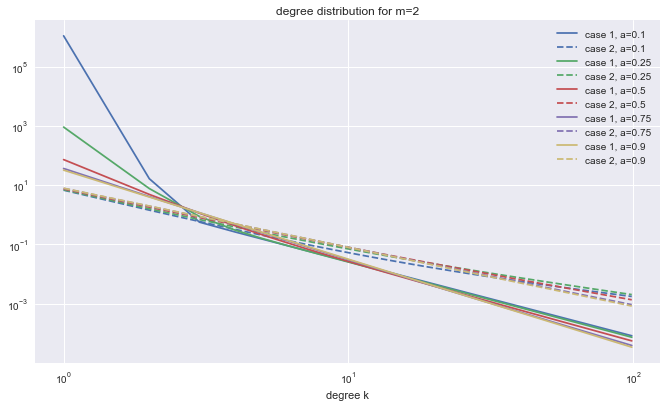

In [3]:
for i, a in enumerate(A):
    C1 = (3*(a+1) + np.sqrt(9*a**2 - 14*a + 9))/4
    C2 = (3*(a+1) - np.sqrt(9*a**2 - 14*a + 9))/4
    p1 = C1 * ( np.power(m/K, 1+C1) + np.power(m/K, 1+C1/a)/a)
    p2 = C2 * ( np.power(m/K, 1+C2) + np.power(m/K, 1+C2/a)/a)
    plt.loglog(K, p1, color=f"C{i}", label=f"case 1, a={a}")
    plt.loglog(K, p2, "--", color=f"C{i}", label=f"case 2, a={a}")
plt.title(f"degree distribution for m={m}")
plt.xlabel("degree k")
plt.legend()
plt.show()

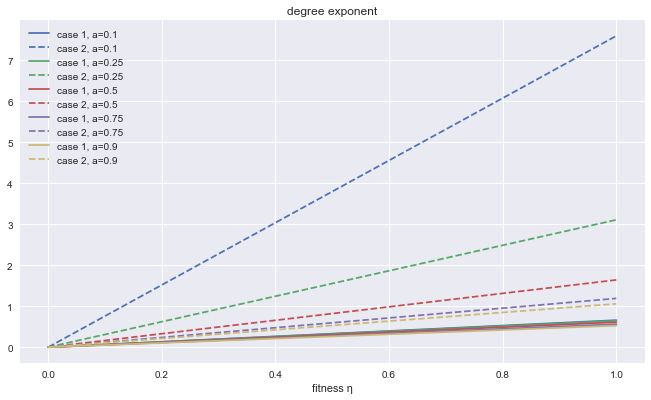

In [4]:
for i, a in enumerate(A):
    C1 = (3*(a+1) + np.sqrt(9*a**2 - 14*a + 9))/4
    C2 = (3*(a+1) - np.sqrt(9*a**2 - 14*a + 9))/4
    b1 = E / C1
    b2 = E / C2
    plt.plot(E, b1, color=f"C{i}", label=f"case 1, a={a}")
    plt.plot(E, b2, "--", color=f"C{i}", label=f"case 2, a={a}")
plt.title("degree exponent")
plt.xlabel("fitness η")
plt.legend()
plt.show()

*(2) The breakdown threshold of networks with a given degree distribution can be written as $f_c = 1 − \frac{1}{\kappa - 1}$ with $\kappa = \frac{\langle k^2 \rangle}{\langle k \rangle}.$ Find explicit expressions for Erdös-Rényi- and scale-free networks. Estimate how the percolation threshold depends on the number of nodes for both network types.*

The degree distribution for Erdös-Renyi networks are binomial and thus the first and second moments are $\langle k \rangle = p (N-1)$ and $\langle k^2 \rangle = N p (1-p) + N^2 p^2.$ These yield $\kappa = \frac{N (Np-p+1)}{N-1}$ and a threshold of $f_c = 1 - \frac{N-1}{(N-1)Np+1} = \mathcal{O}(N^{-1}).$

For the scale-free network we can use the average next-nearest-neighbor expressions from exercise 5. For $2 < \gamma < 3$ we have $\kappa = k_{\mathrm{min}} \frac{2-\gamma}{3-\gamma} \frac{N^{\frac{3-\gamma}{\gamma-1}}-1}{N^{\frac{2-\gamma}{\gamma-1}}-1}$ and thus $f_c = \mathcal{O}(N^{-\frac{1}{\gamma-1}}).$ In the limiting cases we get $\kappa = k_{\mathrm{min}} \frac{N-1}{\log N}$ and $f_c = \mathcal{O}(N^{-1})$ for $\gamma \to 2$ and $\kappa = \frac{k_{\mathrm{min}}}{2} \frac{\sqrt{N}}{\sqrt{N}-1} \log N,\ f_c = \mathcal{O}\left((\log N)^{-1}\right)$ for $\gamma \to 3.$

In both types of networks we see that $f_c \to 1$ for $N \to \infty$ regardless of the choice of parameter.

Below both types of networks are plotted for some exemplary parameter values.

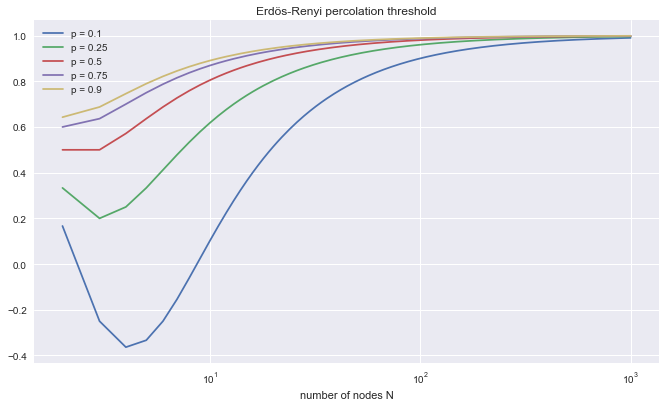

In [17]:
N = np.arange(2, 1000)
P = [0.1, 0.25, 0.5, 0.75, 0.9]

def f_c(kappa):
    return 1 - 1 / (kappa - 1)

for p in P:
    kappa = N * (N*p - p + 1) / (N-1)
    plt.semilogx(N, f_c(kappa), label=f"p = {p}")

plt.title("Erdös-Renyi percolation threshold")
plt.xlabel("number of nodes N")
plt.legend()
plt.show()

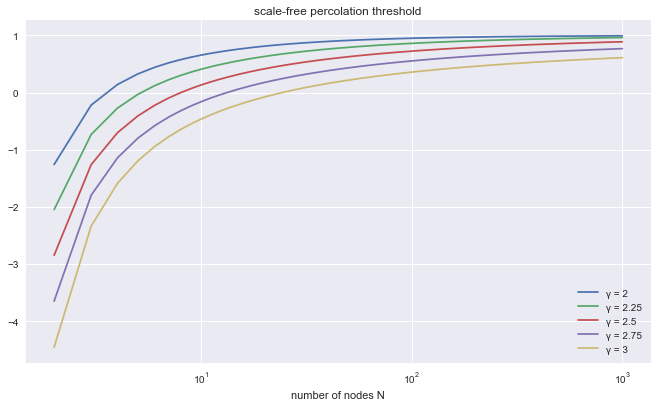

In [18]:
G = [2.25, 2.5, 2.75]
k_min = 1

kappa = k_min * (N-1) / np.log(N)
plt.semilogx(N, f_c(kappa), label="γ = 2")

for g in G:
    kappa = k_min * (2-g) / (3-g) * (np.power(N, (3-g)/(g-1)) - 1) / (np.power(N, (2-g)/(g-1)) - 1)
    plt.semilogx(N, f_c(kappa), label=f"γ = {g}")

kappa = k_min / 2 * np.sqrt(N) / (np.sqrt(N)-1) * np.log(N)
plt.semilogx(N, f_c(kappa), label="γ = 3")

plt.title("scale-free percolation threshold")
plt.xlabel("number of nodes N")
plt.legend()
plt.show()